Download the data, set pandas datetime series. Data from the internet, use at your own risk. 

In [2]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.ticker as mtick
import random, sys

coin = "BTCUSDT"  # change here for other coin ticker symbol
number = 17000   # will not work if downlaoded data is smaller than number here
percentage = 25/100
series = pd.DataFrame(data=None)
try:
    series[list({"date","price"})] = pd.read_csv("https://www.cryptodatadownload.com/cdd/Binance_" + coin + "_1h.csv",skiprows = 1)[list({"date","close"})][:number]
    print("downloaded data:")
    series["date"] = pd.to_datetime(series["date"]) 
    series = series[::-1]
    print(series.tail())  # check downloaded data
    print("working with ",len(series), " entries") 
except:
        sys.exit("some issues with download. Exiting...")

downloaded data:
                 date     price
4 2022-11-29 20:00:00  16496.48
3 2022-11-29 21:00:00  16465.95
2 2022-11-29 22:00:00  16495.59
1 2022-11-29 23:00:00  16442.53
0 2022-11-30 00:00:00  16457.93
working with  17000  entries


Calculation part:

In [3]:
coindip = []
coindipdate = []
lastprice = 0
lastdate = ""
dipstend = []
dipstendprice = []
mindipdate = []
minpricestack = []
j = 0
minprice = series.iloc[0]['price']
mindate = series.iloc[0]['date']
lastprice = series.iloc[0]['price']
lastdate = series.iloc[0]['date']
insidecoindip = False
for i in range(1,len(series)):
    if i % 500 == 0:
        print(i,". price: ", series.iloc[i]['price'], " date: ", series.iloc[i]['date'], " last price: ",lastprice, " coindip: ", '\033[94m', insidecoindip, '\033[0m')
    if minprice > series.iloc[i]['price']:
        minprice = series.iloc[i]['price']
        mindate = series.iloc[i]['date']

    if (insidecoindip == True and series.iloc[i]['price'] >= lastprice):
        insidecoindip = False
        dipstend.append(series.iloc[i]['date'])
        dipstendprice.append(coindip[-1])  
        minpricestack.append(minprice)
        mindipdate.append(mindate)

    if series.iloc[i]['price'] < lastprice * (1- percentage):    
        if insidecoindip == False:
            insidecoindip = True
            coindip.append(lastprice)
            coindipdate.append(lastdate)
            j += 1
    else: 
        if series.iloc[i]['price'] > lastprice:
            lastprice = series.iloc[i]['price']
            lastdate = series.iloc[i]['date']
            minprice = series.iloc[i]['price']
            insidecoindip = False
            continue

if insidecoindip == True:
    dipstend.append(series.iloc[i]['date'])
    dipstendprice.append(0) 
    minpricestack.append(minprice)
    mindipdate.append(mindate)
print("ready for the next step")

500 . price:  37192.1  date:  2021-01-11 00:00:00  last price:  41454.13  coindip:   False 
1000 . price:  32853.73  date:  2021-01-31 20:00:00  last price:  41454.13  coindip:   True 
1500 . price:  57499.01  date:  2021-02-21 17:00:00  last price:  57733.96  coindip:   False 
2000 . price:  60001.91  date:  2021-03-14 14:00:00  last price:  61648.26  coindip:   False 
2500 . price:  57708.05  date:  2021-04-04 10:00:00  last price:  61648.26  coindip:   False 
3000 . price:  49550.73  date:  2021-04-25 11:00:00  last price:  64577.26  coindip:   True 
3500 . price:  49375.28  date:  2021-05-16 07:00:00  last price:  64577.26  coindip:   True 
4000 . price:  35989.67  date:  2021-06-06 03:00:00  last price:  64577.26  coindip:   True 
4500 . price:  32283.65  date:  2021-06-26 23:00:00  last price:  64577.26  coindip:   True 
5000 . price:  31834.33  date:  2021-07-17 19:00:00  last price:  64577.26  coindip:   True 
5500 . price:  43370.23  date:  2021-08-07 15:00:00  last price:  64

Charting part:

diff 30 days 22:00:00  start to dip:  2021-01-08 14:00:00 at price:  41454.13 end of dip: 2021-02-08 12:00:00  min price: 29528.31  min date: 2021-01-22 00:00:00
diff 19 days 16:00:00  start to dip:  2021-02-21 18:00:00 at price:  58183.69 end of dip: 2021-03-13 10:00:00  min price: 43119.02  min date: 2021-02-28 17:00:00
diff 189 days 07:00:00  start to dip:  2021-04-14 06:00:00 at price:  64577.26 end of dip: 2021-10-20 13:00:00  min price: 29238.99  min date: 2021-06-22 13:00:00
diff 384 days 07:00:00  start to dip:  2021-11-10 17:00:00 at price:  68633.69 end of dip: 2022-11-30 00:00:00  min price: 15649.52  min date: 2022-11-21 21:00:00


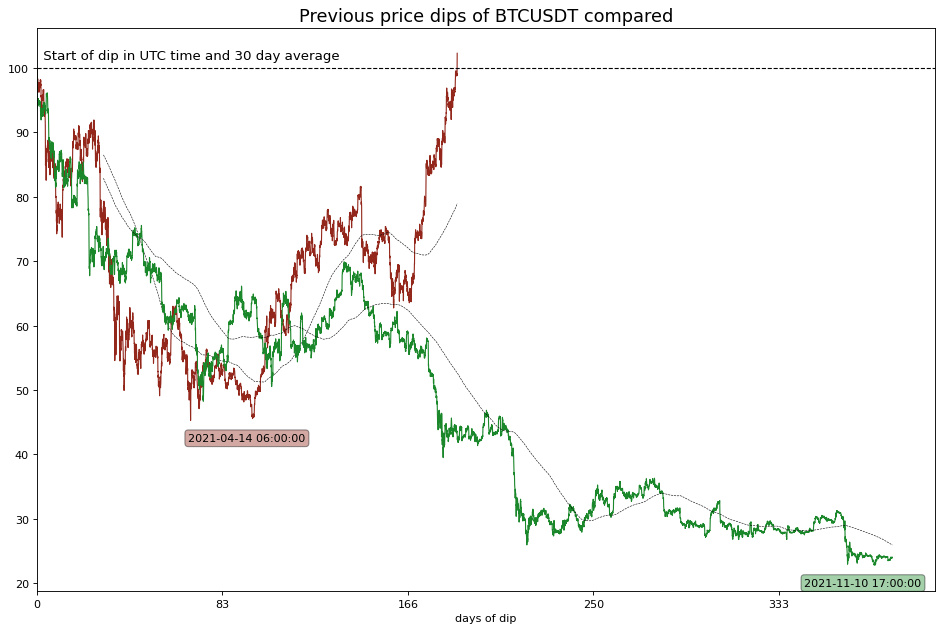

In [14]:
charting = pd.DataFrame()
addme = pd.DataFrame()
for a, b, p, mp, md in zip(dipstend, coindipdate, coindip, minpricestack, mindipdate): 
    print("diff", a - b, " start to dip: ", b, "at price: ", p , "end of dip:", a , " min price:", mp, " min date:", md)
    interval = (series['date'] >= b) & (series['date'] <= a)  # select interval of dip
    if interval.sum() < 900:  # omit short dips
        continue
    addme[str(b)] = series["price"].loc[interval].reset_index(drop = True)  # join intervals, reset indexes
    charting = pd.concat([charting, addme[str(b)]], axis=1, ignore_index= False)  
    addme = pd.DataFrame()

charting = charting.div(charting.iloc[0])*100  # set origin to 100

fig, ax = pyplot.subplots(1,figsize = (12, 8), dpi = 80)
ax.set_xlabel("days of dip")
for i in list(charting.columns):
    color = (random.random(), random.random(), random.random())
    ax.plot(charting[i],  lw = 1, c = color)
    x = charting[i].idxmin()  # placing legend near minimum point to disperse in the chart
    y = charting[i].iloc[x]   
    if x/charting.index.max() > 0.9:  # check if text box not too far right 
        x = int(charting.index.max()*0.9)
    boxproperties = dict(boxstyle='round', facecolor=color, alpha=0.4)   # format legends
    ax.text(x-25,y -2 , i, fontsize=10,   verticalalignment='top', bbox=boxproperties)
    mean = charting[i].rolling(window = 720).mean()  # add mean 
    ax.plot(mean,  lw = 0.5, linestyle = "dashed", c = "black")

ticks = mtick.FuncFormatter(lambda x, pos: '{0:g}'.format(int(x/24)))  # 24 hours to days
ax.xaxis.set_major_formatter(ticks)
ax.axhline(100,  color = "black", linestyle = "dashed", lw = 1)  # top line at 100
ax.set_xlim(xmin=0)
ax.set_title("Previous price dips of " + coin + " compared")
ax.title.set_fontsize(16)
ax.text(25,103," Start of dip in UTC time and 30 day average ", fontsize=12,   verticalalignment='top')
pyplot.tight_layout()
pyplot.show()